In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

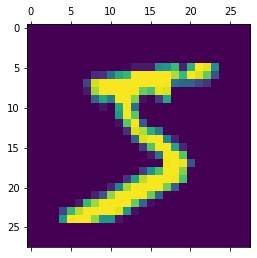

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

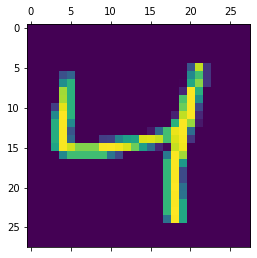

In [ ]:
plt.matshow(X_train[2])

In [ ]:
y_train[2]

4

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# to convert 2*2 matrix of pixels into single array pixel:
X_train_flat = X_train.reshape(len(X_train),28*28)

In [ ]:
X_test_flat = X_test.reshape(len(X_test),28*28)

In [ ]:
X_train_flat.shape

(60000, 784)

In [ ]:
X_test_flat.shape

(10000, 784)

In [ ]:
X_train_flat[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
# max-min scaling: to increase accuracy we can standardarize the values of X_train  by dividing it with max(X_train)-min(X_train)
X_train_flat = X_train_flat/np.max(X_train_flat)
X_test_flat = X_test_flat/np.max(X_test_flat)

In [ ]:
# neural network consist of only two layers i.e. input layer (784 neurons i.e. each pixel as one neuron) and output layer(0 to 9):
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')]) # Dense to connect each input layer 
                                                                                            # neuron with each output layer neuron
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4692 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9216
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2736 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9254


In [ ]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2670 - accuracy: 0.9245


[0.2670302391052246, 0.9244999885559082]

In [ ]:
model.predict(X_test_flat)

array([[1.8583030e-02, 4.6766979e-07, 9.3838662e-02, ..., 9.9980235e-01,
        1.2152657e-01, 7.4208987e-01],
       [4.3529630e-01, 5.5321157e-03, 9.9939954e-01, ..., 7.2847815e-13,
        1.9649905e-01, 4.2951580e-09],
       [4.8890710e-04, 9.9278712e-01, 6.6477954e-01, ..., 1.5654874e-01,
        3.8286364e-01, 4.4707209e-02],
       ...,
       [3.8297994e-06, 6.3711182e-06, 1.7564893e-03, ..., 2.4069503e-01,
        5.3326339e-01, 8.4844565e-01],
       [1.0819581e-04, 2.0265579e-04, 2.1573901e-04, ..., 4.4243141e-05,
        6.5989858e-01, 1.3312697e-04],
       [6.8148077e-03, 7.1280082e-10, 2.0644319e-01, ..., 2.3920030e-08,
        2.0822883e-04, 2.1381602e-06]], dtype=float32)

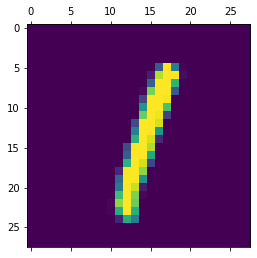

In [ ]:
plt.matshow(X_test[5])

In [ ]:
y_predicted = model.predict(X_test_flat)
y_predicted[5]

array([8.0851889e-05, 9.9755037e-01, 5.0732547e-01, 4.5006824e-01,
       6.8492889e-03, 2.3429900e-02, 8.6652637e-03, 5.7473123e-01,
       4.9895129e-01, 1.5420356e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[5])

1

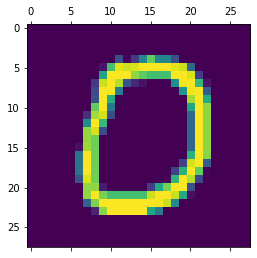

In [ ]:
plt.matshow(X_test[10])

In [ ]:
y_predicted[10]

array([9.9862832e-01, 2.0368259e-07, 4.4938999e-01, 1.1261034e-01,
       1.0762291e-04, 8.9659715e-01, 1.7715394e-02, 3.5708294e-05,
       6.6083622e-01, 7.4312091e-04], dtype=float32)

In [ ]:
np.argmax(y_predicted[10])

0

In [ ]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predicted_label, labels=[0,1,2,3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.95      0.92      0.93       982
           5       0.89      0.88      0.89       892
           6       0.95      0.94      0.94       958
           7       0.94      0.91      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.88      0.93      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_label, labels=[0,1,2,3,4,5,6,7,8,9])
print(cm)

[[ 955    0    2    2    0    8    7    3    2    1]
 [   0 1113    3    2    0    1    4    2   10    0]
 [   3    9  924   21    6    5   10   10   39    5]
 [   1    0   18  925    0   26    2   10   19    9]
 [   1    1    5    2  899    0   10    4    9   51]
 [   7    3    3   32    7  789    9    4   30    8]
 [  11    3    9    1    7   20  902    2    3    0]
 [   1    5   23    8    7    0    0  940    2   42]
 [   5    8    7   24    9   30    8   11  861   11]
 [   9    7    1   11   14    8    0   18    4  937]]


Text(69.0, 0.5, 'Actual')

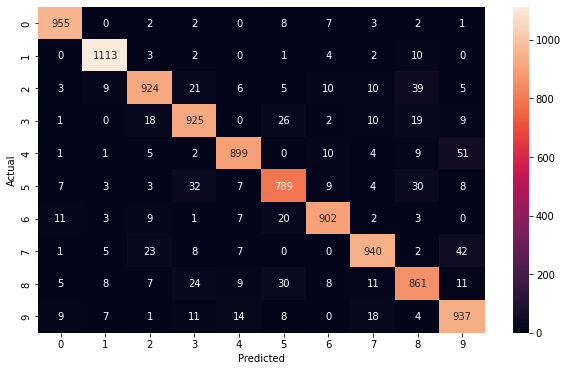

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# adding a hidden layer (100 neurons) to the model:

model2 = keras.Sequential([keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')])
                                                                                            
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model2.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2712 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1239 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0879 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0525 - accuracy: 0.9844


In [ ]:
model2.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9755


[0.08037912100553513, 0.9754999876022339]

In [ ]:
model2.predict(X_test_flat)

array([[4.3633878e-03, 4.9500988e-05, 7.9378080e-01, ..., 9.9999762e-01,
        1.2935960e-01, 2.4607167e-01],
       [3.2923818e-03, 9.6421587e-01, 9.9999714e-01, ..., 2.8181998e-06,
        1.9299448e-01, 2.9435137e-06],
       [2.4723113e-03, 9.9801362e-01, 2.5904000e-01, ..., 3.4875548e-01,
        4.1078496e-01, 9.2026591e-04],
       ...,
       [5.4124972e-05, 2.1787031e-05, 2.3992125e-05, ..., 3.6698133e-01,
        5.5790198e-01, 9.5936334e-01],
       [7.8537464e-03, 3.7790835e-03, 4.3210387e-04, ..., 1.5905499e-04,
        9.7698975e-01, 8.4802668e-06],
       [9.4673038e-04, 1.7557442e-03, 6.0528815e-02, ..., 2.2998452e-04,
        2.4747550e-03, 8.3933912e-05]], dtype=float32)

In [ ]:
y_predicted2 = model2.predict(X_test_flat)

In [ ]:
y_predicted_label2 = [np.argmax(i) for i in y_predicted2]
y_predicted_label2[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [ ]:
print(classification_report(y_test, y_predicted_label2, labels=[0,1,2,3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.95      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(69.0, 0.5, 'Actual')

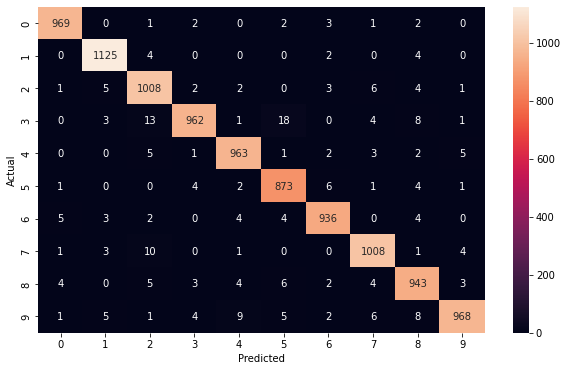

In [ ]:
cm = confusion_matrix(y_test, y_predicted_label2, labels=[0,1,2,3,4,5,6,7,8,9])
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d') # if annot=True it will not fill anything inside the matrix, make it True 
plt.xlabel('Predicted')
plt.ylabel('Actual')